[ 3.85808441 -0.04715255  0.        ]
[4.30682207 0.44523115 0.        ]
[ 4.4491159  -0.24135772  0.        ]
[ 4.35453252 -0.02991662  0.        ]
[4.78926472 0.76512828 0.        ]
[ 1.65566152 -0.21495423  0.        ]
[ 8.72237807e+00 -1.53718840e-03  0.00000000e+00]
[ 8.97485167 -0.02764497  0.        ]
[ 9.02213139 -0.05174439  0.        ]
[10.01764352  1.36934992  0.        ]
[ 8.95281806 -0.13918352  0.        ]
[ 8.42186018 -0.01537529  0.        ]
[7.48434745 0.01043922 0.        ]
[ 4.02521779 -0.29761603  0.        ]
[ 3.85744728 -0.15112759  0.        ]
[2.98008595 0.26752297 0.        ]
[11.20240612  0.32376973  0.        ]
[11.2745717  0.3160653  0.       ]
[12.4733892   1.19326117  0.        ]
[6.62614346 0.36309064 0.        ]
[6.13318574 0.14369498 0.        ]
[5.54876561 0.13181097 0.        ]
[11.61964668  0.05382071  0.        ]
[ 6.5093903  -0.08641883  0.        ]
[ 5.77297488 -0.07243521  0.        ]
[8.55672571 0.08215597 0.        ]
[ 7.26425546 -0.04215767  0

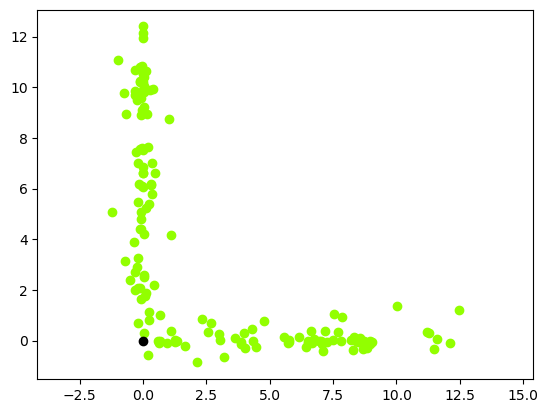

In [1]:
from pyoptools.all import *
from math import sqrt, pi, radians,cos, sin
import random

#lens setup
lens_radius = 25
L1 = SphericalLens(radius=lens_radius, curvature_s1=1./100., curvature_s2=-1./100., thickness=10, material=material.schott["N-BK7"])
CCD = CCD(size=(25, 25))

#f = L1.paraxial_constants()
#print(f)

lens_location = (0, 0, 0)
CCD_location = (0, 0, 145)

#S=optical system and components and their spatial orientations
S = System(complist=[(L1, lens_location, (0, 0, 0)), (CCD, CCD_location, (0, 0, 0))], n=1)
OA = Ray(pos=(0,0,0), dir=(0,0,1), intensity=100, wavelength=.350)
#S=System(complist=[(name,location,rotation), (other components)], refractive index(n))
#L1 and CCD have no rotation here, you can add rotation by changing the zeros
#n is the refractive index equals to air here
#OA defines the origin ray, travels along z-axis here, helps visualize plot

num_ps = 100 #number of point sources
source_wavelength = 0.550
num_rays = 5 #number of rays emitted per point source

source_z_distance = -275 #distance of the point source from origin, behind lens since -z

R = [] #list to store rays
for i in range(num_ps): #loop will generate rays from the point sources
    #print(i)
    if i < num_ps // 2:
        x = random.uniform(-lens_radius, 0)
        y = 0
    else:
        x = 0
        y = random.uniform(-lens_radius, 0)
    
    pos = (x, y, source_z_distance) #setting point source position
    
    for j in range(num_rays): #multiple rays from each point source
        phi = random.uniform(0, 2 * pi) #randomly varying the ray angle
        theta_deg = random.uniform(0,15)
        theta = radians(theta_deg)
        
        dir_z = cos(theta) 
        dir_x = sin(theta)*cos(phi)
        dir_y = sin(theta)*sin(phi)
    
        ray = Ray(pos=pos, dir=(dir_x, dir_y, dir_z), wavelength=source_wavelength) #creating the ray
        R.append(ray) #adds ray to list

'''
R2 = [] 
for i in range(num_ps):
    if i < num_ps // 2:
        x = random.uniform(0, lens_radius)
        y = 0
    else:
        x = 0
        y = random.uniform(0, lens_radius)
    
    pos = (x, y, -100)
    
    for j in range(num_rays):

        phi = random.uniform(0, 2 * pi)
        
        theta_deg = random.uniform(0,15)
        theta = radians(theta_deg)
        
        dir_z = cos(theta) 
        dir_x = sin(theta)*cos(phi)
        dir_y = sin(theta)*sin(phi)
    
        ray2 = Ray(pos=pos, dir=(dir_x, dir_y, dir_z), wavelength=0.650)
        R2.append(ray2)
        '''
        
#S.ray_add(R2)        
S.ray_add(R) #adds rays from R
S.ray_add(OA) #adds ray from OA
S.propagate()


#inr = intersection(Ray[1], Ray[2])  #checks intersections between specific rays
#print(inr)

#op = optical_path()   #computes and prints optical path data
#print(op)

#r=R[0]               #child rays of a specific ray (secondary ray, ray that is created after original ray interacts with lens)
#print(r.childs)


#find_ppp(S, OA)      #point of perfect focus and optical path difference

#f=(nearest_points(R[110].get_final_rays()[0],R[115].get_final_rays()[0])[0][2])-(find_ppp(S, OA)[2])
#print(f)

#opd = CCD.get_optical_path_data()     #optical path data for CCD
#print(opd)

#pm = CCD.get_optical_path_map(size=(10,10))    #optical path map
#print(pm)

for CHL,R in CCD.hit_list:  #iterates through CCD hit list and collects info
    print(CHL)
'''
path = '/Users/ab/Documents/IAState/FacultyMentor/Switchillator/Python/Plenoptic/SpotDiagramData/sdLshape.xlsx'
data = []
for CHL,R in CCD.hit_list:
    data.append(CHL)
    print(CHL)

df = pd.DataFrame(data, columns=['x', 'y', 'z'])
try:
    df.to_excel(excel_writer=path, sheet_name='sdLshape.xlsx', index=False)
    print("Export successful.")
except Exception as e:
    print(f"Error occurred: {e}")
    '''
#exports spot diagram data to an excel file

spot_diagram_c(CCD)
#Plot3D(S, center=(0, 0, 200), size=(450, 200), scale=2, rot=[(0, -pi/2, 0), (pi/20, -pi/10, 0)])
